#  Task 5 - Backtesting

#### import libraries

In [1]:
# --- Imports & Paths ---
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Local modules
import sys
sys.path.append("../src")

In [2]:
from portfolio_opt import optimize_portfolio, plot_efficient_frontier,expected_return_from_tsla_forecast

#### Load Data

In [3]:
tsla_prices = pd.read_csv("../data/TSLA.csv", parse_dates=["Date"]).set_index("Date")["Close"]
bnd_prices  = pd.read_csv("../data/BND.csv",  parse_dates=["Date"]).set_index("Date")["Close"]
spy_prices  = pd.read_csv("../data/SPY.csv",  parse_dates=["Date"]).set_index("Date")["Close"]

prices = pd.concat([tsla_prices.rename("TSLA"),
                    bnd_prices.rename("BND"),
                    spy_prices.rename("SPY")], axis=1).dropna()


In [4]:
prices.head()

,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816753,174.917099
2015-07-02,18.667999,60.967087,174.756973
2015-07-06,18.648001,61.177567,174.259613
2015-07-07,17.858667,61.237720,175.355453
2015-07-08,16.997334,61.410622,172.413437


#### Backtesting 

In [5]:
from backtest_strategy import backtest_portfolio, compute_portfolio_returns, annualized_sharpe

TSLA expected annual return: -3.441362750737213


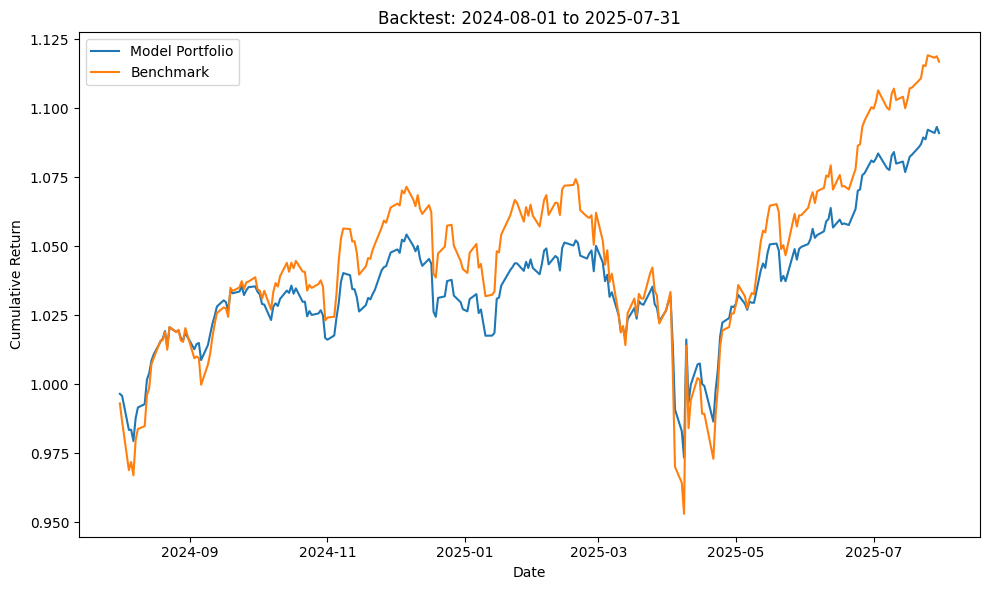

=== Backtest Results ===
strategy_total_return: 9.10%
benchmark_total_return: 11.68%
strategy_sharpe: 1.03
benchmark_sharpe: 0.96


/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/notebooks/../src/backtest_strategy.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "strategy_total_return": strategy_cum[-1] - 1,
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/notebooks/../src/backtest_strategy.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "benchmark_total_return": benchmark_cum[-1] - 1,


In [6]:
# Compute daily returns
daily_returns = prices.pct_change().dropna()

# Load TSLA forecast CSV
tsla_fc = pd.read_csv("../model/tsla_future_forecast.csv", parse_dates=["Date"]).set_index("Date")

# Compute annualized expected return
tsla_exp_ann = expected_return_from_tsla_forecast(tsla_fc)
print("TSLA expected annual return:", tsla_exp_ann)

frontier = optimize_portfolio(daily_returns, tsla_expected_return_annual=tsla_exp_ann)
strategy_weights = frontier.max_sharpe.weights

# Benchmark: 60% SPY / 40% BND
benchmark_weights = {"TSLA": 0.0, "BND": 0.4, "SPY": 0.6}

# Backtest period
start_date = "2024-08-01"
end_date   = "2025-07-31"

# Run backtest
results = backtest_portfolio(
    daily_returns=daily_returns,
    strategy_weights=strategy_weights,
    benchmark_weights=benchmark_weights,
    start_date=start_date,
    end_date=end_date
)

print("=== Backtest Results ===")
for k, v in results.items():
    print(f"{k}: {v:.2%}" if "return" in k else f"{k}: {v:.2f}")
